## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 109.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pan

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import numpy as np
import pandas as pd
import math

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# loading the dataset
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/PGIAML/Python/module 2 - Machine Learning/final-project/Loan_Modelling.csv')

# copying the data to another variable to avoid any changes to original data
df = data.copy()

Mounted at /content/drive


## Data Overview

### Displaying the first few rows of the dataset

In [4]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking the shape of the dataset

In [5]:
# Checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5000 rows and 14 columns.


### Checking 10 random rows of the dataset

In [6]:
# Let's view a sample of the data
df.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


### Checking Datatypes

In [7]:
# Checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Checking for Missing Values

In [8]:
# Checking for missing values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


### Analyzing Negative Numbers

In [9]:
# Checking Negative number for experience
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


Since there are negative numbers in experiece, we can group the median by people with their same age.

In [10]:
# Step 1: Replace negative Experience with NaN
df.loc[df['Experience'] < 0, 'Experience'] = np.nan

# Step 2: Fill NaNs with median Experience by Age
df['Experience'] = df.groupby('Age')['Experience'].transform(lambda x: x.fillna(x.median()))

# Step 3: Fill any remaining NaNs with overall median
df['Experience'].fillna(df['Experience'].median(), inplace=True)

In [11]:
# Re-checking for missing values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


### Checking for duplicate values

In [12]:
# Checking the number of unique values in each column
df.nunique()

,0
ID,5000
Age,45
Experience,44
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


### Cleaning useless fields

In [13]:
# Drop ID Column
df.drop(columns=['ID'], inplace=True)

In [14]:
# Drop ZIPCode Column
df.drop(columns=['ZIPCode'], inplace=True)

### Checking the Statistical Summary

In [15]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.174400,11.386462,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


Observation:

  - There are negative years of experiece

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

The below functions need to be defined to carry out the EDA.

In [25]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

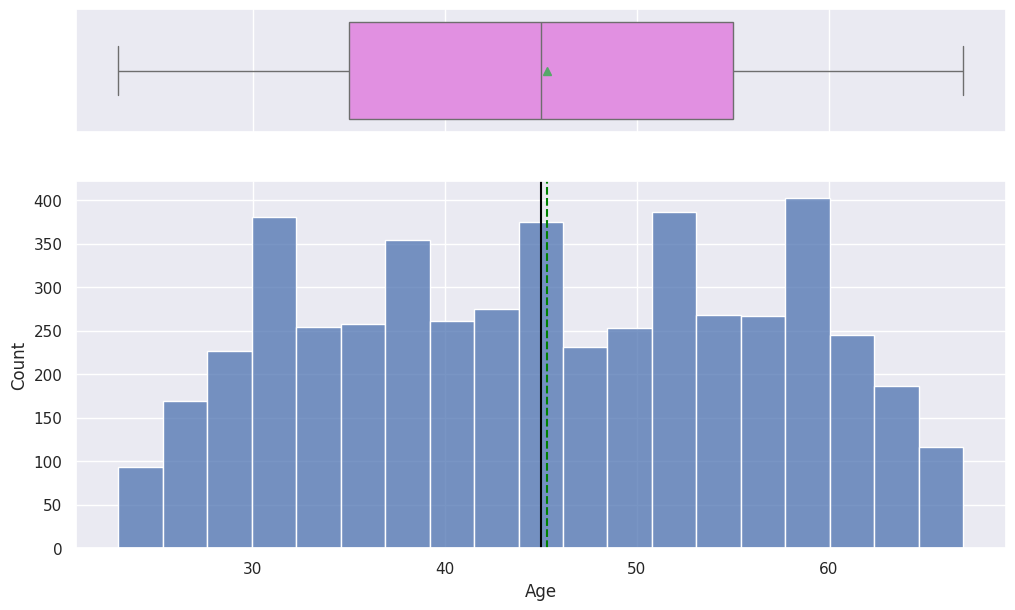

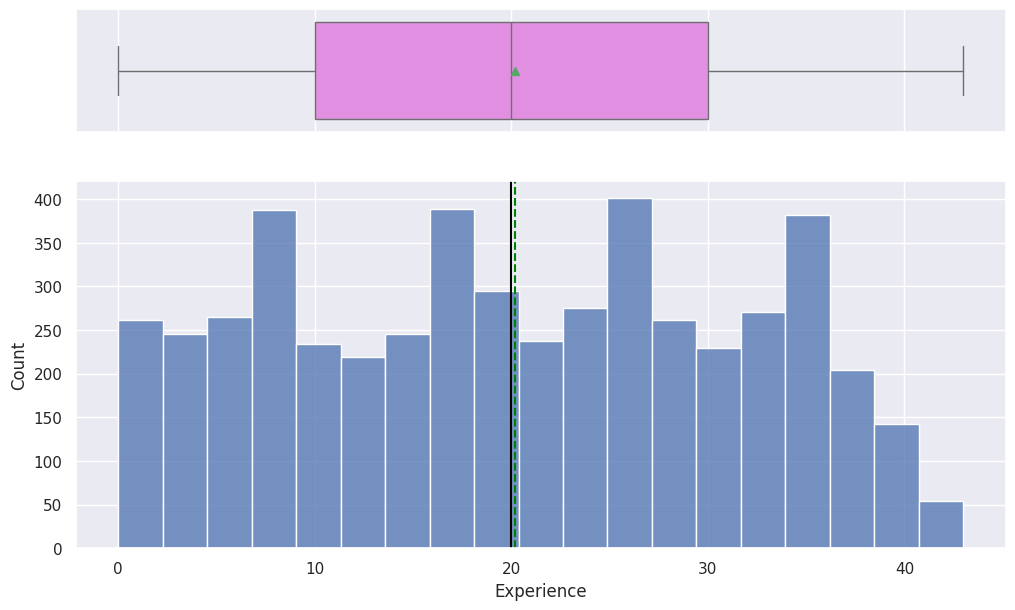

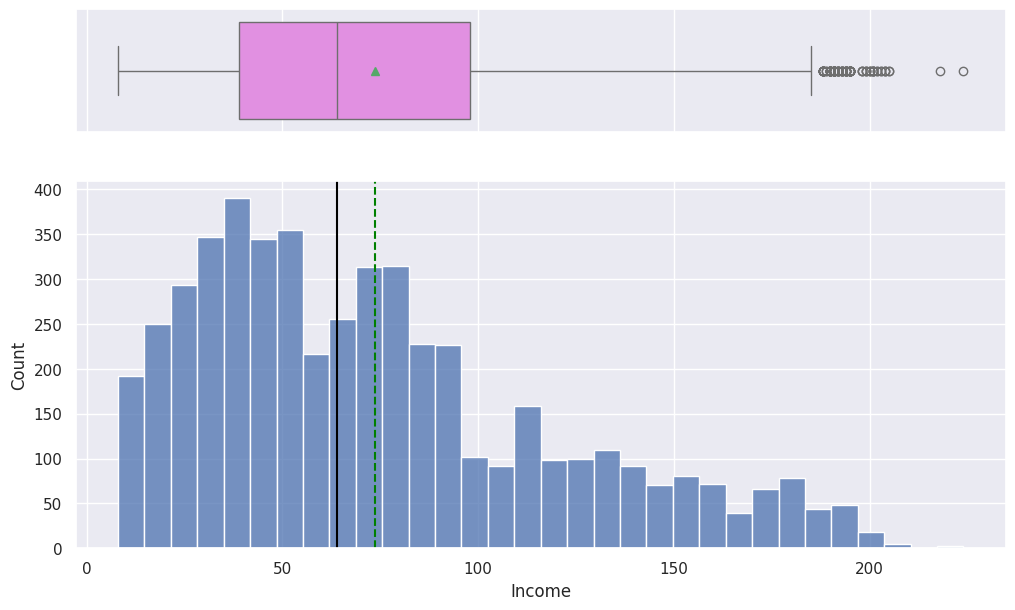

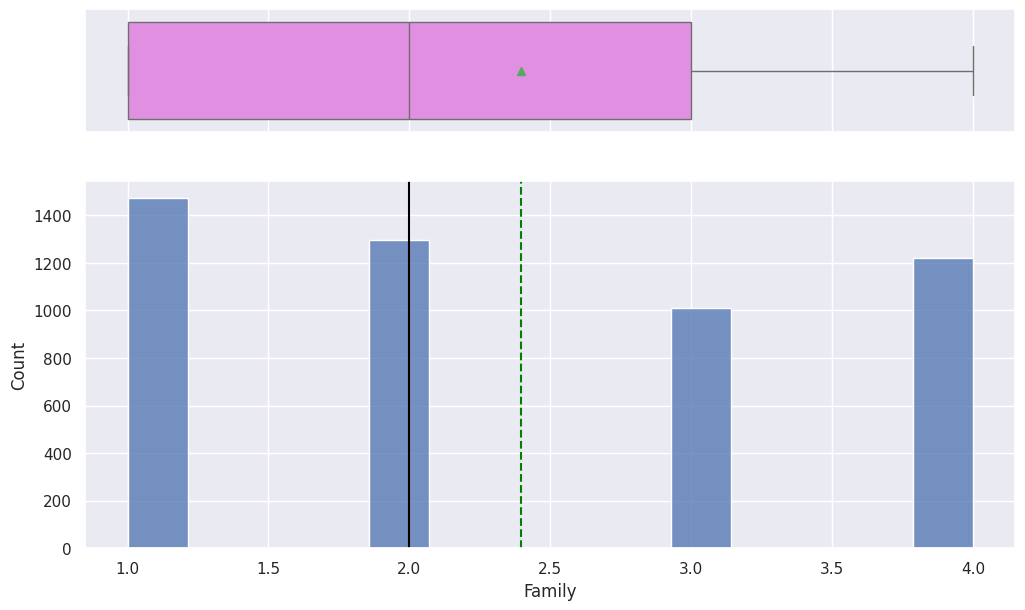

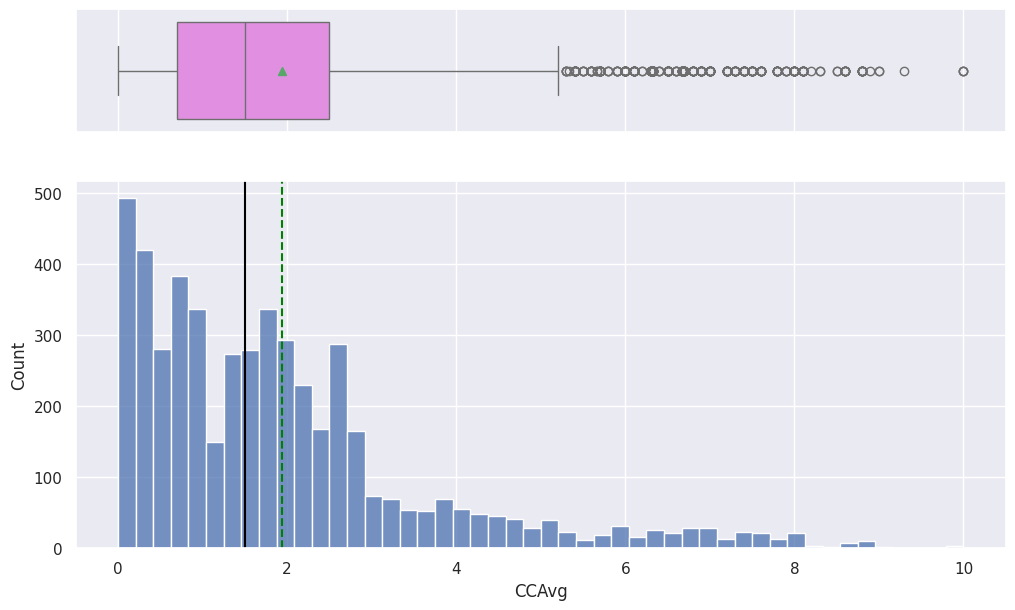

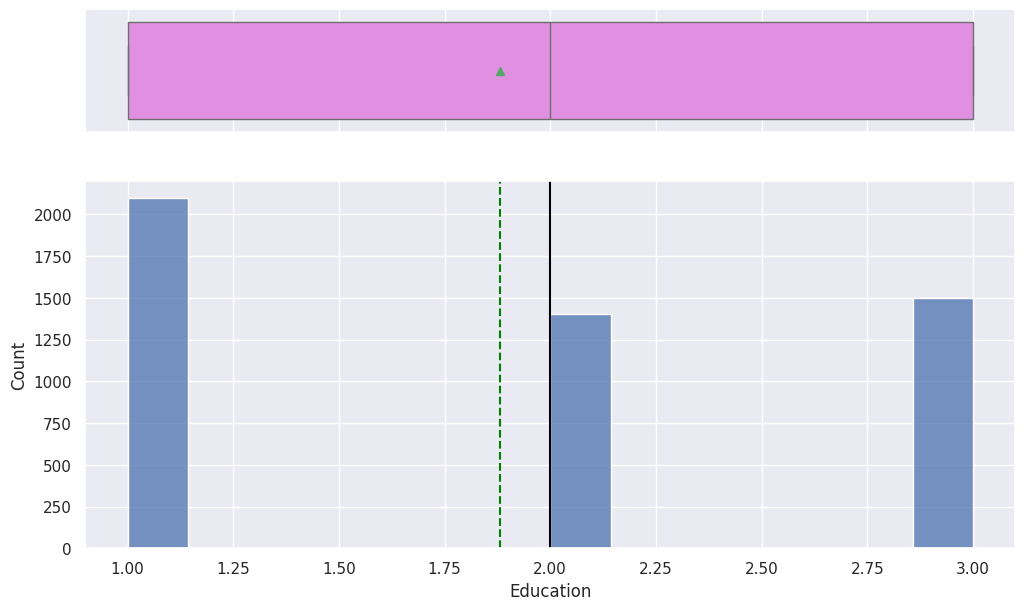

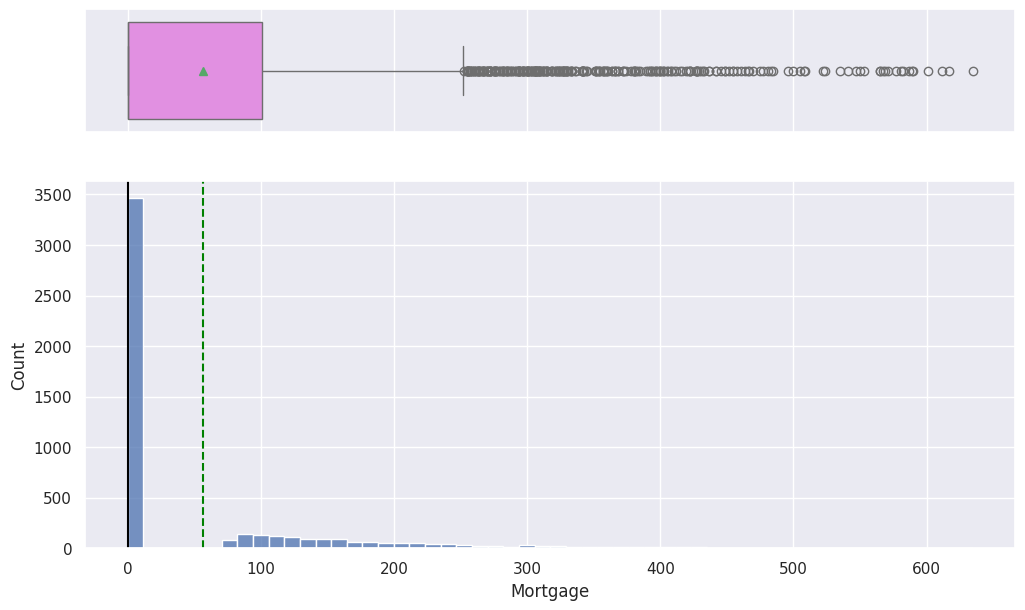

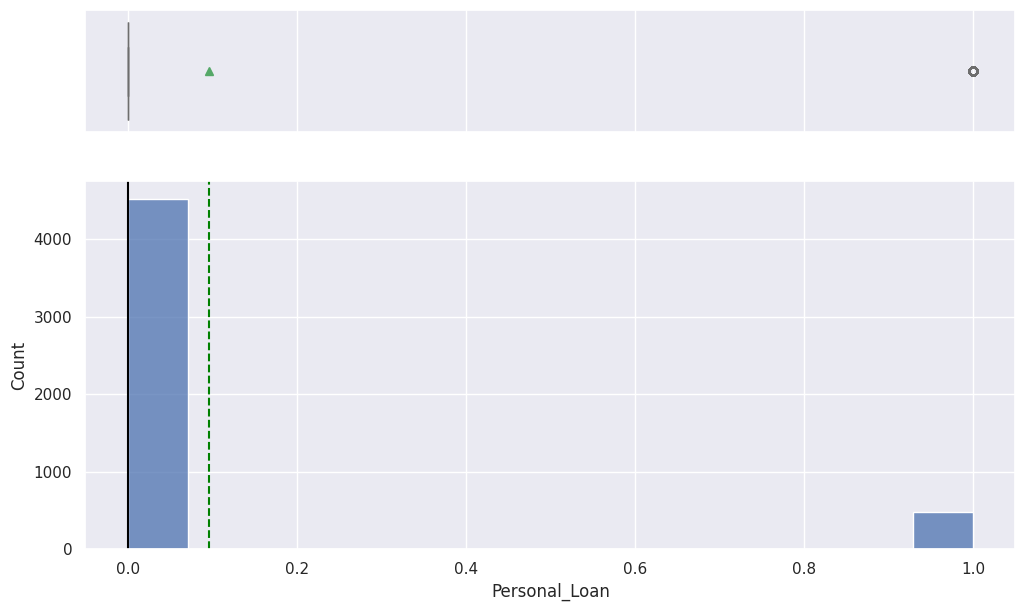

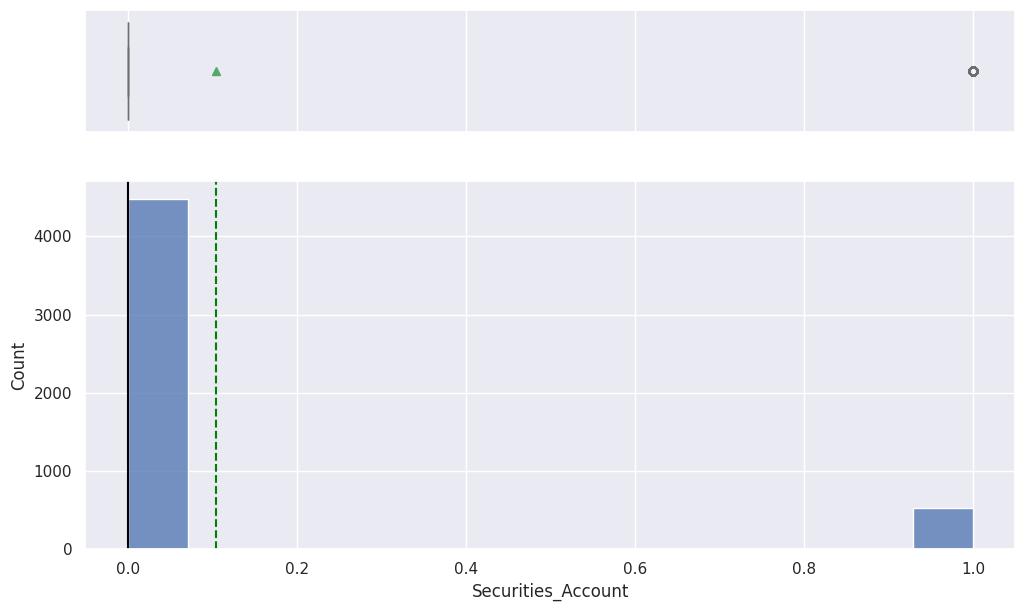

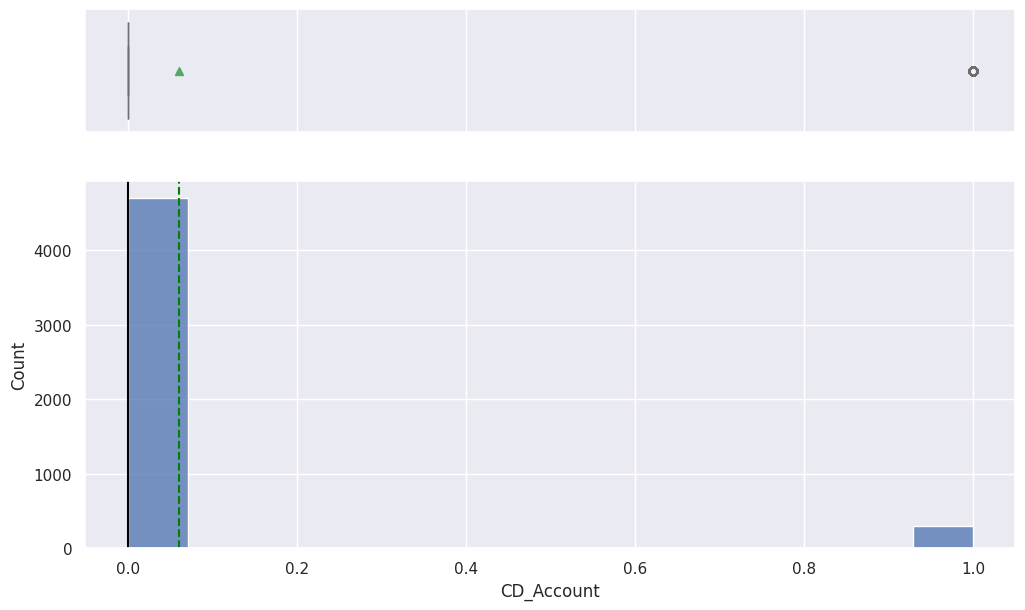

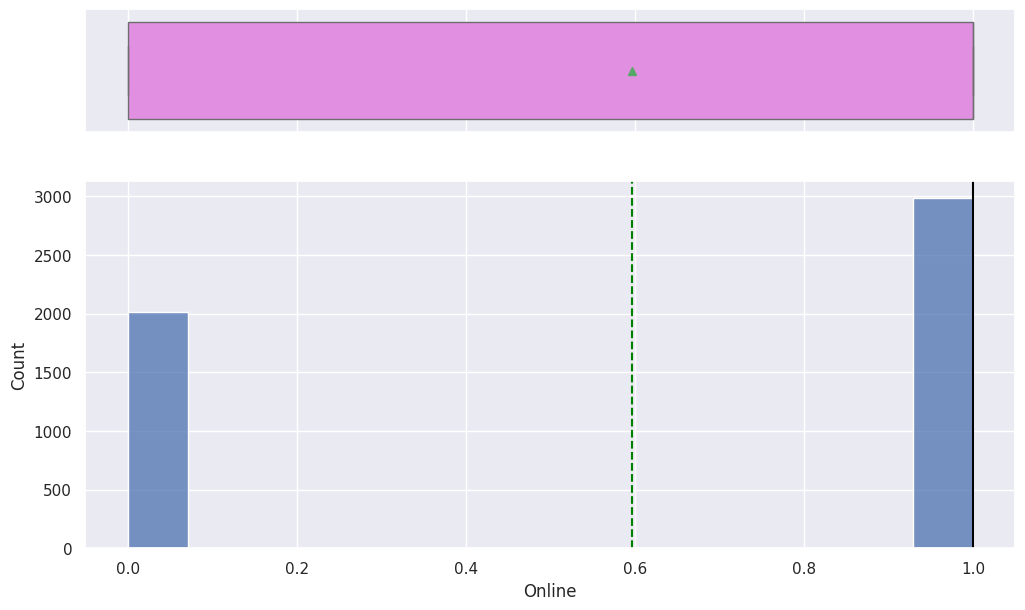

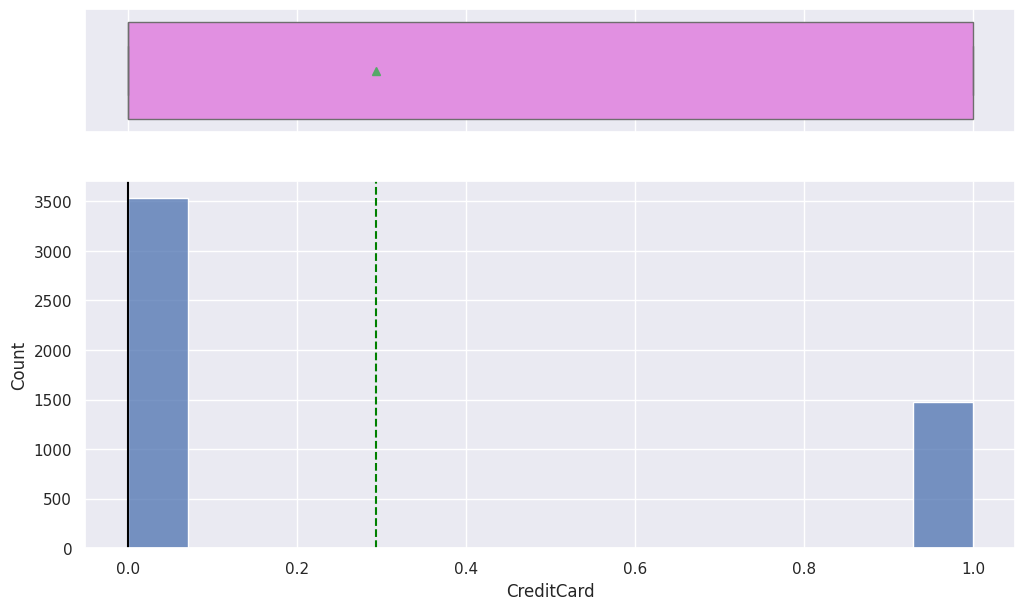

In [27]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        histogram_boxplot(df, col)

Checking distribution and outliers of Mortgage

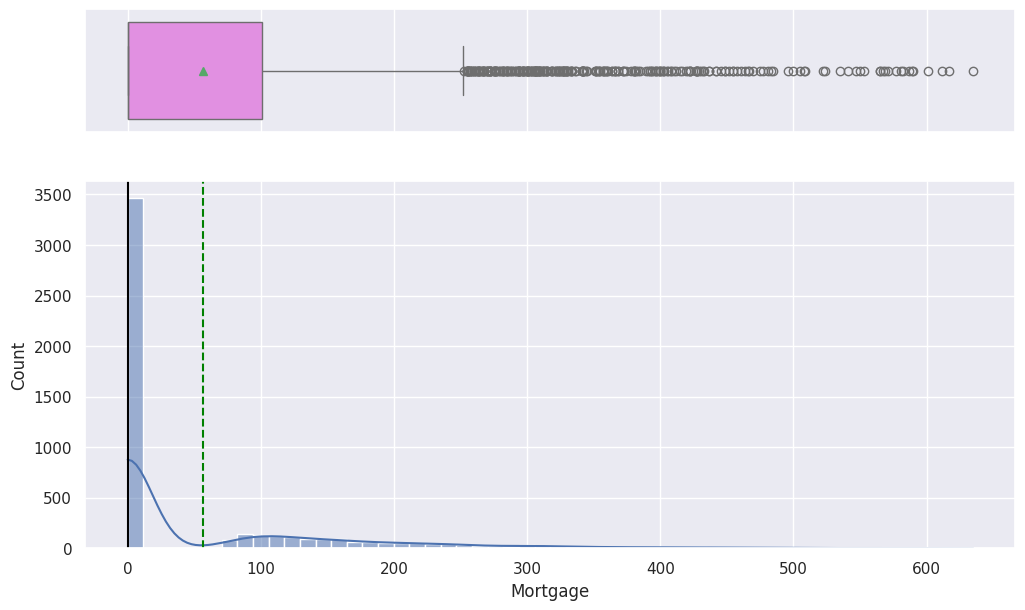

In [28]:
histogram_boxplot(df, "Mortgage", kde=True)

Checking how many customers have a credit card

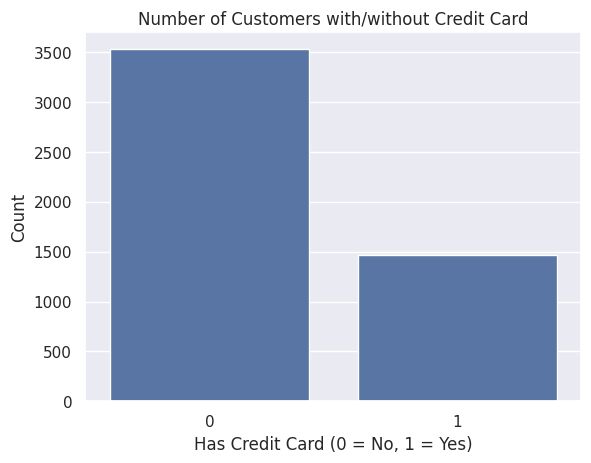

In [29]:
sns.countplot(x='CreditCard', data=df)
plt.title('Number of Customers with/without Credit Card')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

1470 customers have a credit card

Observations:

  - There is an outlier in the annual income, with some customers earning between 300k and 400K, significantly above the majority.

  - Most customers did not accept the personal loan offer from the last campaign.

  - In terms of education, the majority of customers do not have a graduate-level degree.

  - Most customers do not have a credit card issued by another bank.

  - Customers tend to use online banking facilities frequently.

  - There is a noticeable outlier in mortgage values: while most customers have no mortgage, those who do typically hold mortgages between 80K and 300K.

  - Most customers spend less than $2,000 monthly on their credit cards.

### Bivariate Analysis

Let's check for correlations:

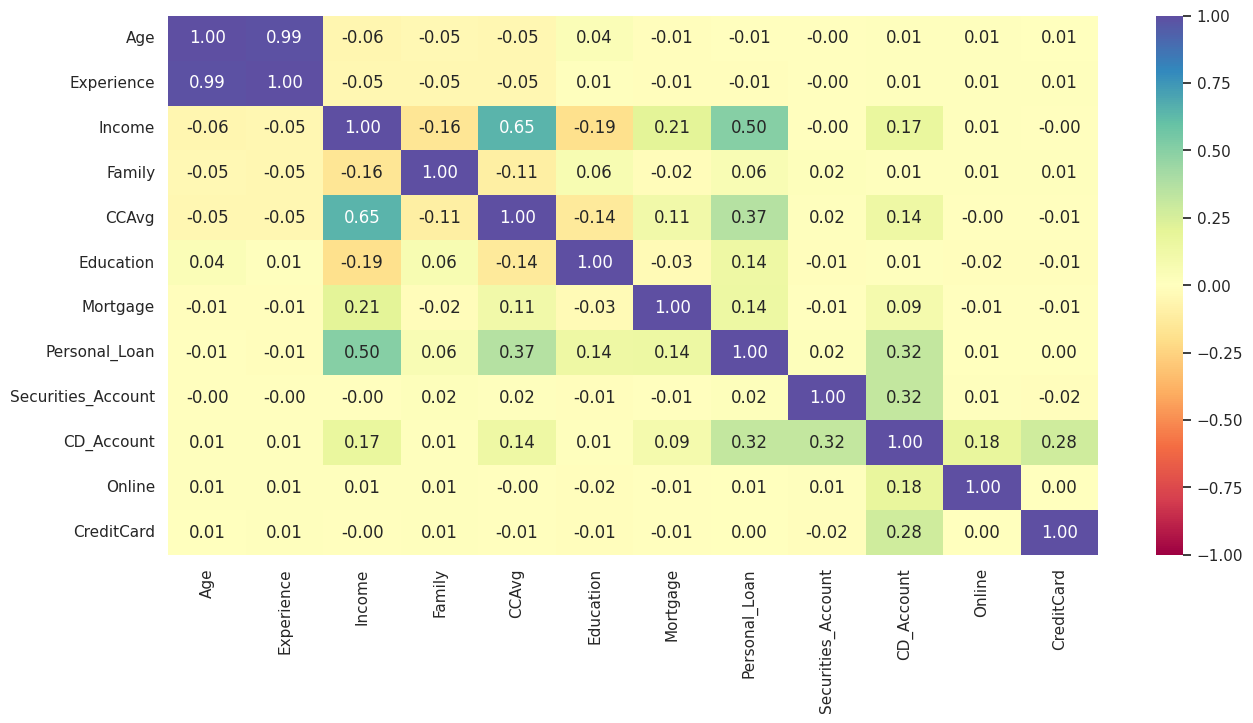

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
  - There is a moderate positive correlation between Income and Personal Loan
  - There is a moderate positive correlation between Income and CCAvg

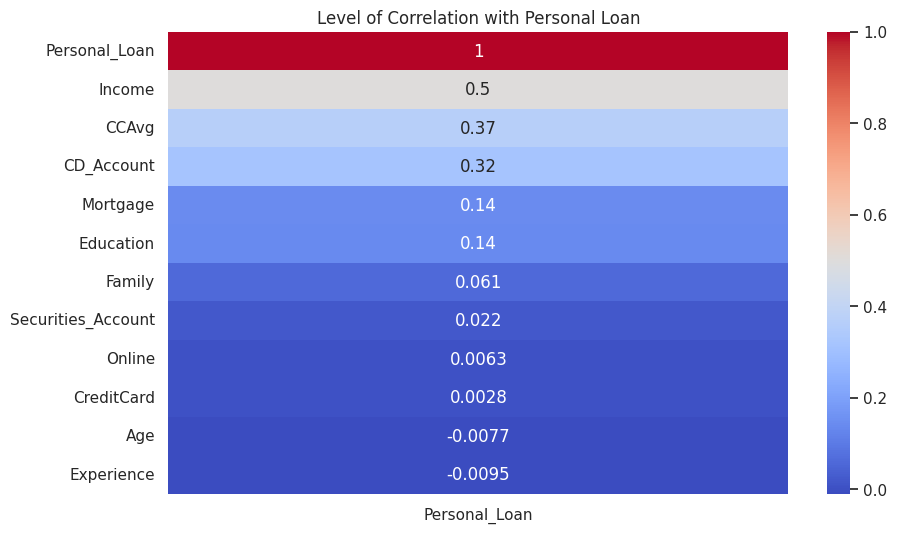

In [31]:
# Plot only correlations with Personal Loan
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True)[['Personal_Loan']].sort_values(by='Personal_Loan', ascending=False), annot=True, cmap='coolwarm')
plt.title("Level of Correlation with Personal Loan")
plt.show()

Income has the strongest relationship with Personal Loan

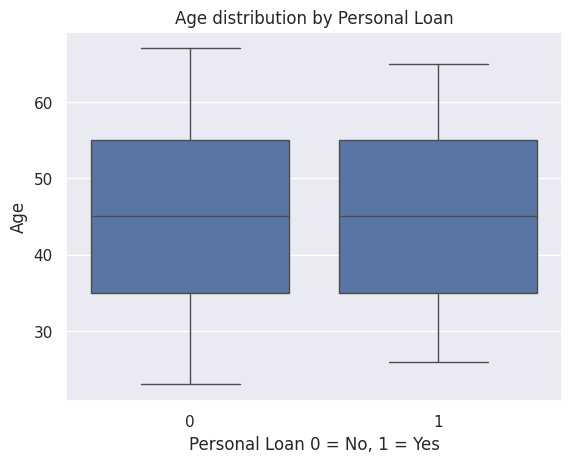

In [32]:
# Boxplot with correlation between customer's personal loan interest and their age
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title("Age distribution by Personal Loan")
plt.xlabel("Personal Loan 0 = No, 1 = Yes")
plt.ylabel("Age")
plt.show()

Correlation between customer's personal loan interest and their education

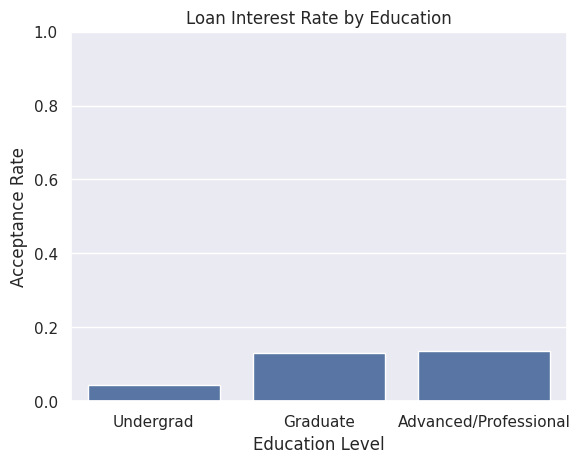

In [33]:
loan_by_education = df.groupby('Education')['Personal_Loan'].mean()

# Map labels for readability
loan_by_education.index = loan_by_education.index.map({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})

# Barplot
sns.barplot(x=loan_by_education.index, y=loan_by_education.values)
plt.title("Loan Interest Rate by Education")
plt.ylabel("Acceptance Rate")
plt.xlabel("Education Level")
plt.ylim(0, 1)
plt.show()

- Observation

  - Customers with Advanced/Professional Education are more interesting in Personal Loans

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Outlier Check

- Let's check for outliers in the data.

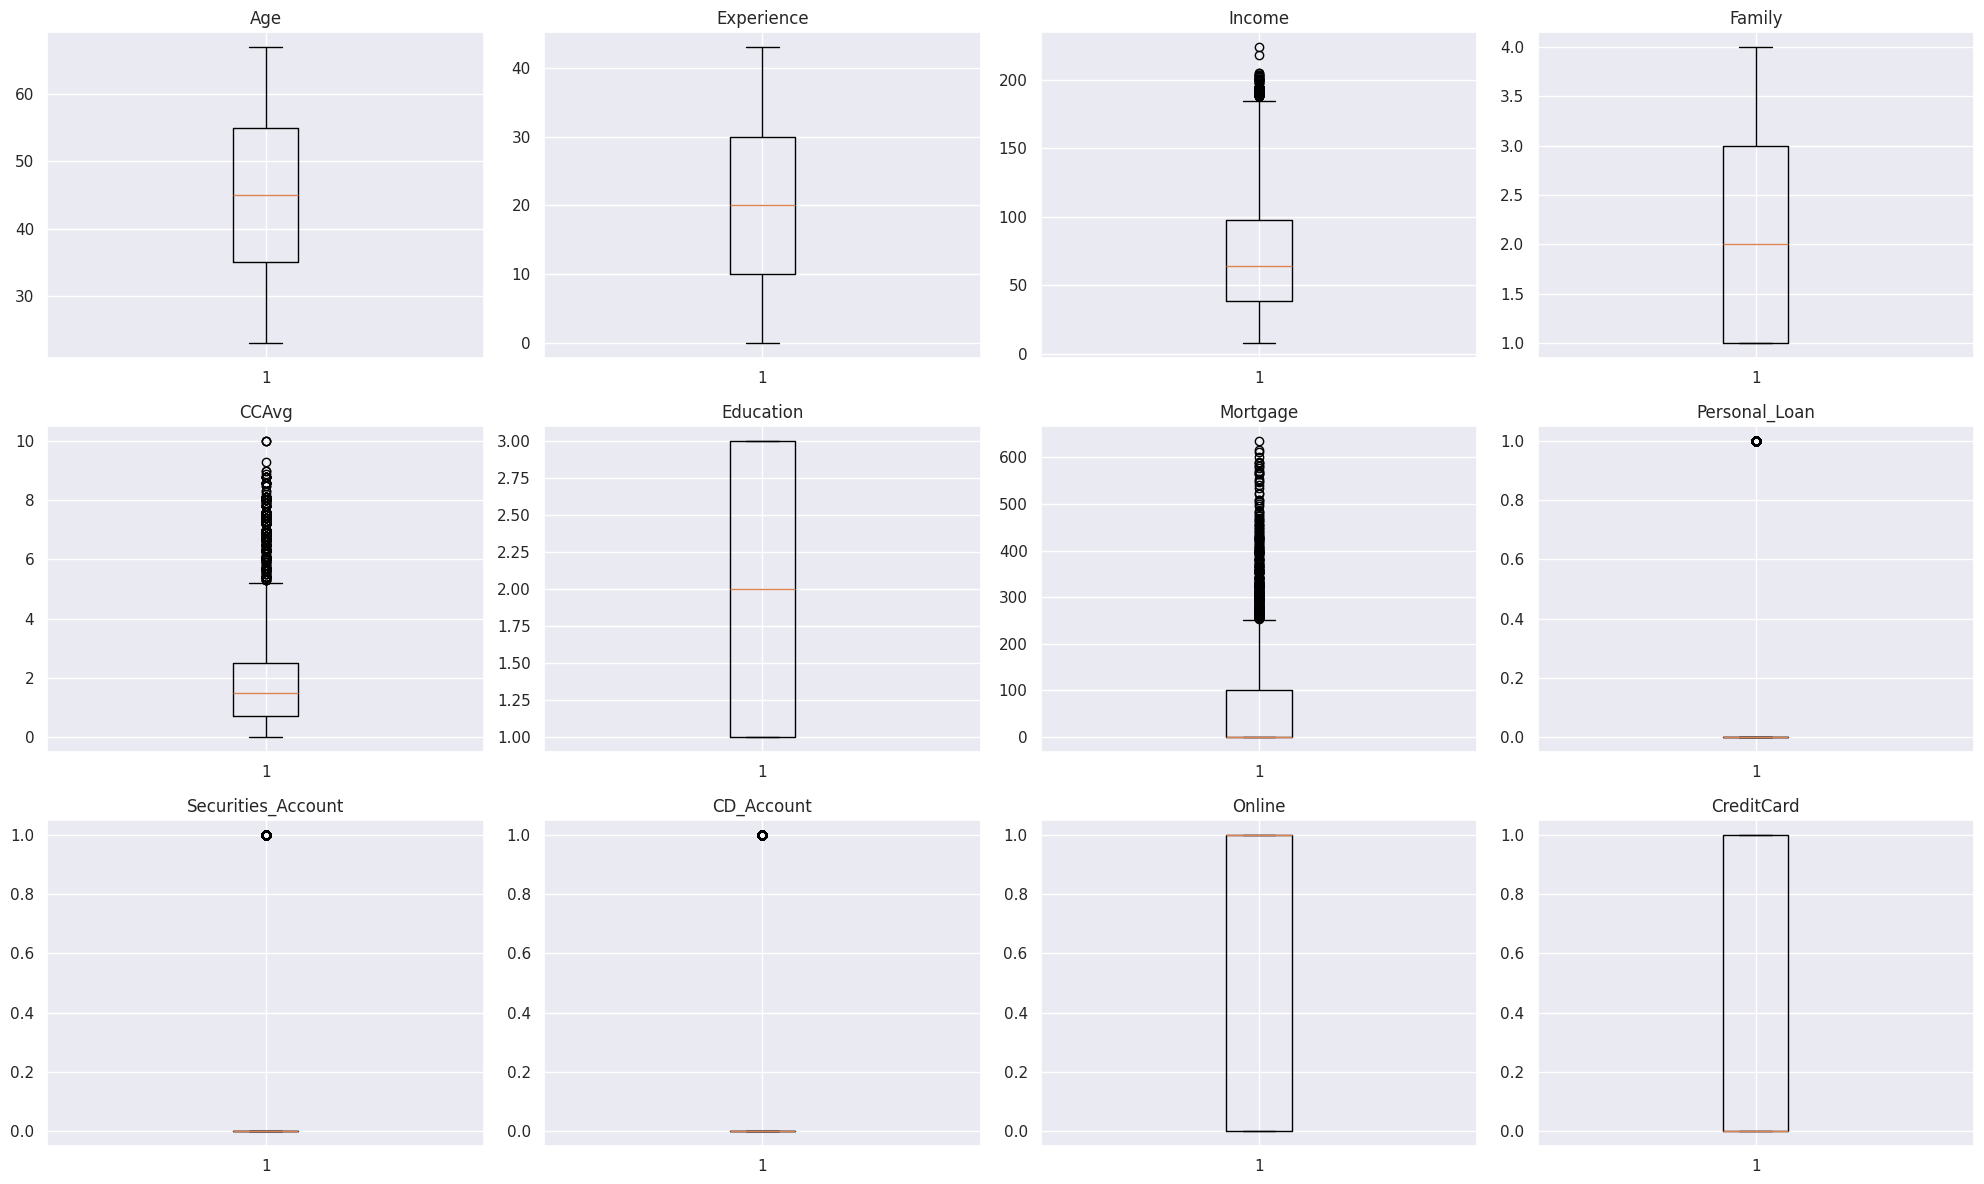

In [34]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, variable in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)

plt.tight_layout()
plt.show()

Observations:
  - There is an outliers in the Mortgage, CCAVG and Income
  - We will not treat the outliers since most of those outliers are not disjoint from the curve

### Data Preparation for Modeling


In [35]:
X = df.drop(columns=['Personal_Loan'])
Y = df['Personal_Loan']

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [36]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4000, 11)
Shape of test set :  (1000, 11)
Percentage of classes in training set:
Personal_Loan
0    0.90625
1    0.09375
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.895
1    0.105
Name: proportion, dtype: float64


- We had seen around 90% of observations in class 0 (may not accept the offer) and 10% of observations in class 0 (may accept the offer). The results are very similar for both the training and test sets.

## Model Building

### Model Evaluation Criterion

The model can make two types of wrong predictions:

False Negative (FN):
Predicts that the customer will not accept the loan, but in reality, they would have accepted.
→ Lost opportunity to convert a customer.

False Positive (FP):
Predicts that the customer will accept the loan, but in reality, they will not.
→ Wasted effort on marketing to someone not interested.

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,}, index=[0],)

    return df_perf

In [38]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Default Decision Tree

In [39]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

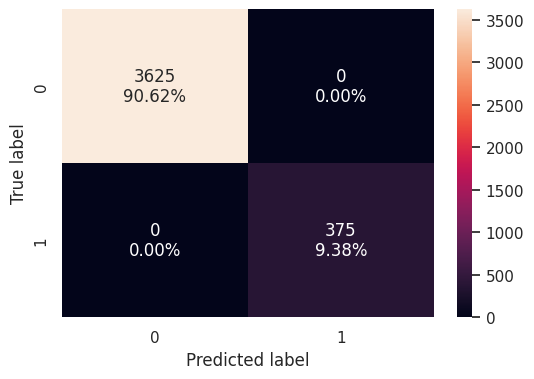

In [40]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [41]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


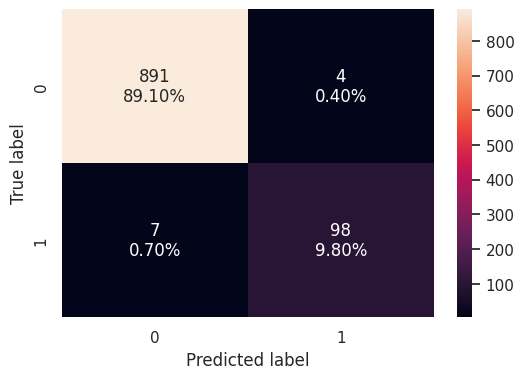

In [42]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [43]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.989,0.933333,0.960784,0.94686


* Model Evaluation

In [44]:
# Training data
print("Training Performance:")
display(model_performance_classification_sklearn(model0, X_train, y_train))

# Test data
print("Test Performance:")
display(model_performance_classification_sklearn(model0, X_test, y_test))

Training Performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Test Performance:


,Accuracy,Recall,Precision,F1
0,0.989,0.933333,0.960784,0.94686


Observations:

- The model performs well on the training data but shows some drop on the test set, indicating some possible overfitting.

## Model Performance Improvement

- Decision Tree (with class_weights)

In [45]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

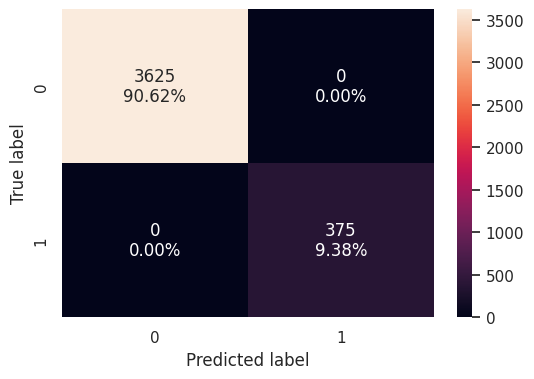

In [46]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [47]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


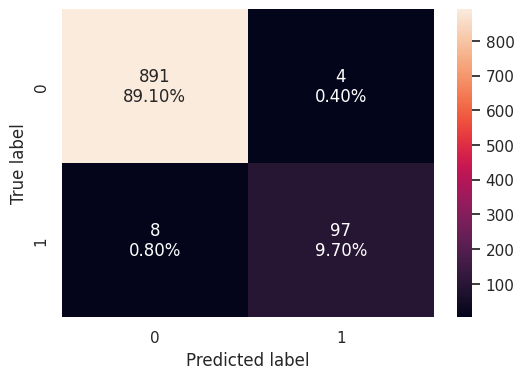

In [48]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [49]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.988,0.92381,0.960396,0.941748


### Decision Tree (Pre-pruning)

In [66]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [59]:
# Let's set an instance of the best model
model2 = best_estimator

# Fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

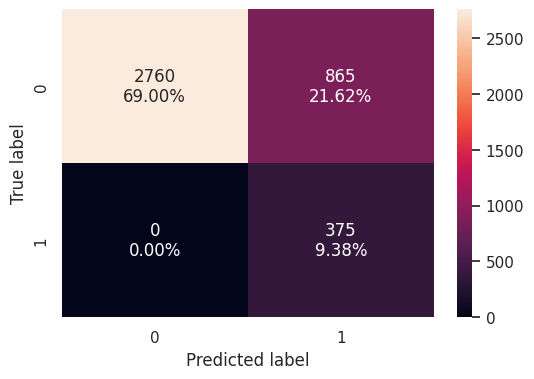

In [60]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [61]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.78375,1.0,0.302419,0.464396


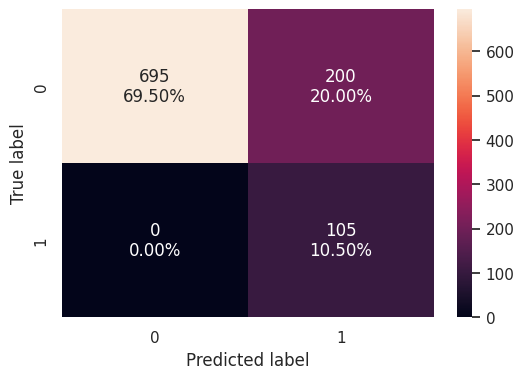

In [62]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [63]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.8,1.0,0.344262,0.512195


In [64]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

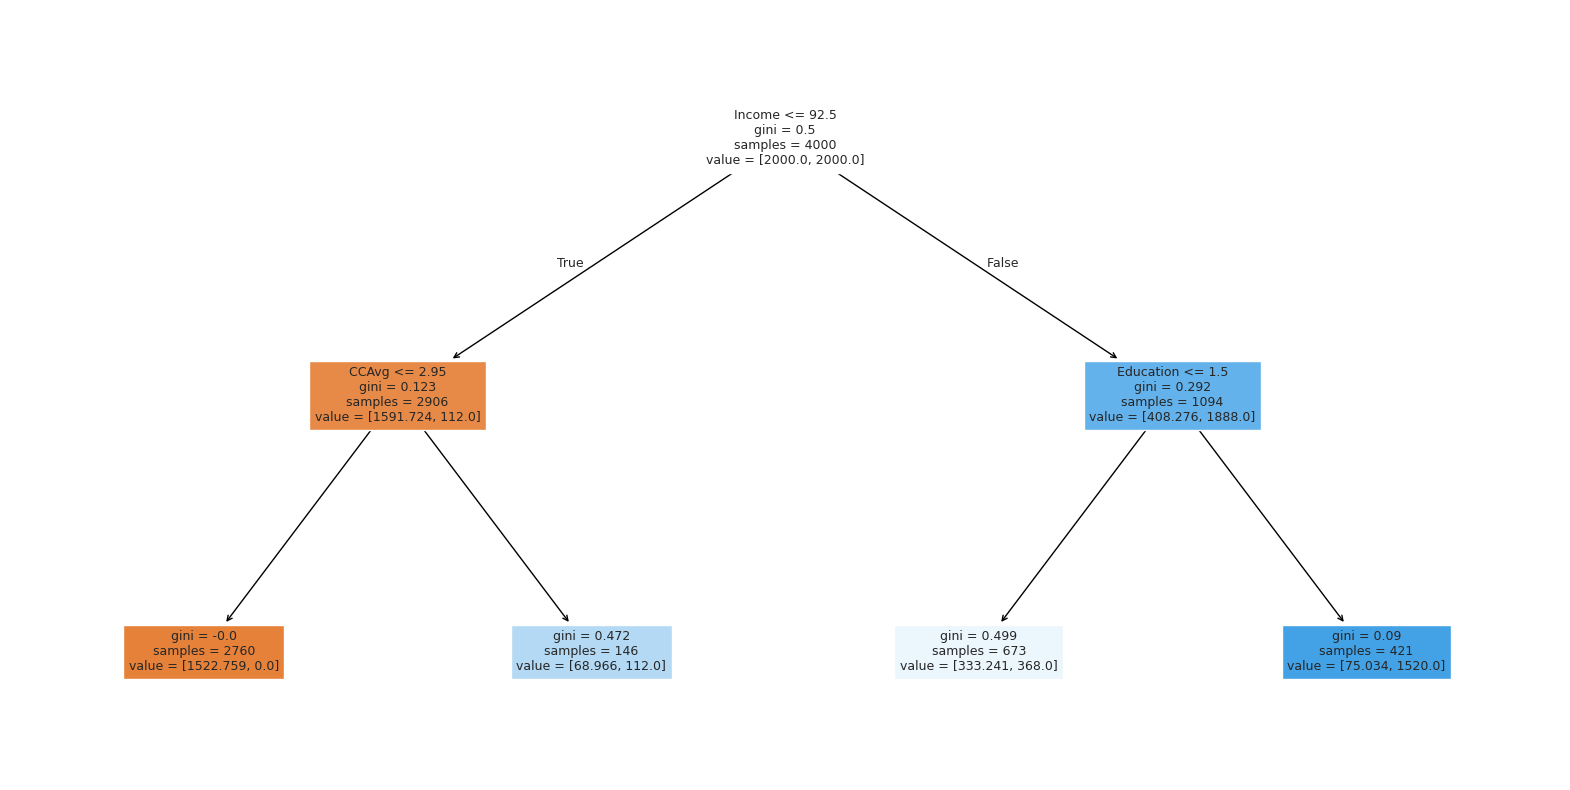

In [65]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# The code below will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [67]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1522.76, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [68.97, 112.00] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [333.24, 368.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [75.03, 1520.00] class: 1



In [68]:
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.78724451, 0.        , 0.0871452 ,
       0.12561029, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

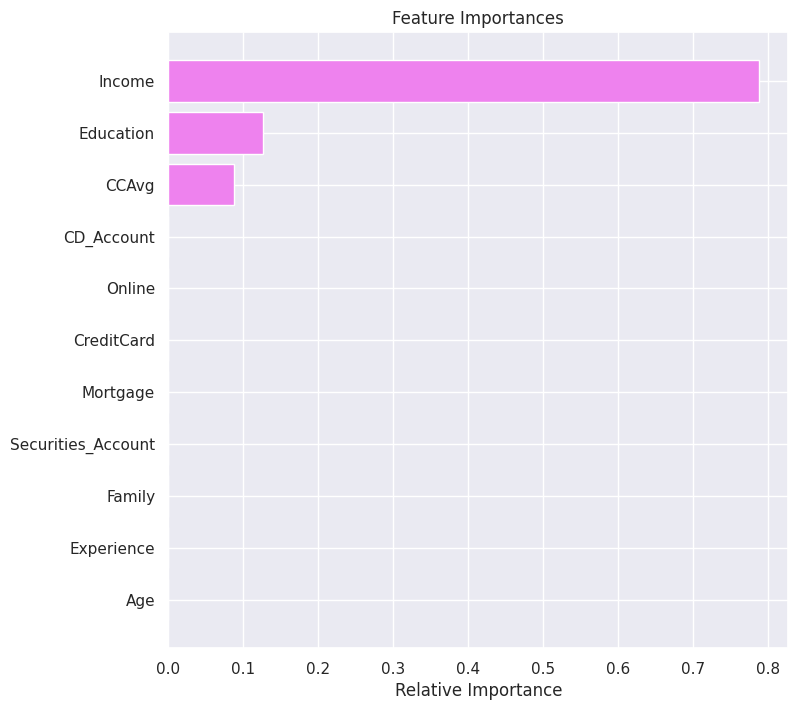

In [70]:
# Importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Here in this importance we can see that Income, Education and CCAvg are the most influential variables.

### Decision Tree (Post-pruning)

In [71]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [72]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-9.927793e-15
1,2.450147e-19,-9.927548e-15
2,2.450147e-19,-9.927303e-15
3,2.450147e-19,-9.927058e-15
4,4.594026e-19,-9.926598e-15
5,4.594026e-19,-9.926139e-15
6,8.575516e-19,-9.925282e-15
7,8.728650e-19,-9.924409e-15
8,1.102566e-18,-9.923306e-15
9,2.358267e-18,-9.920948e-15


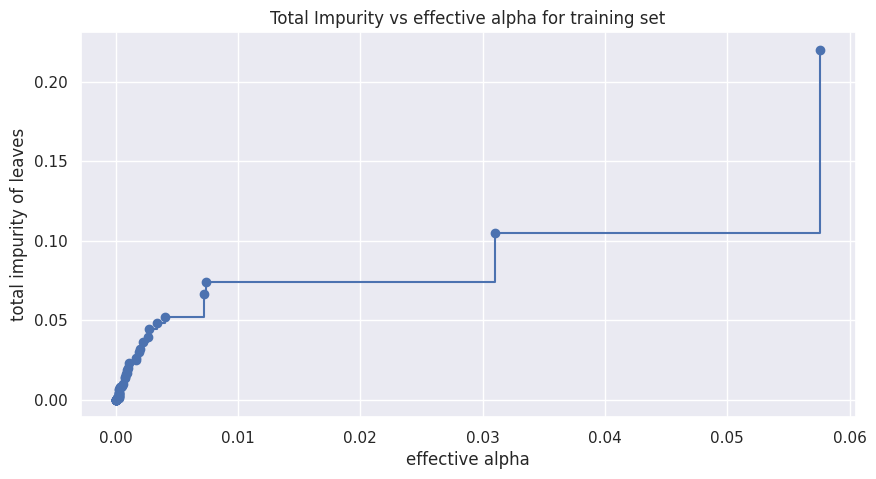

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

-  Next, we are going to train a decision tree using the effective alphas.

In [74]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.27983896368075395


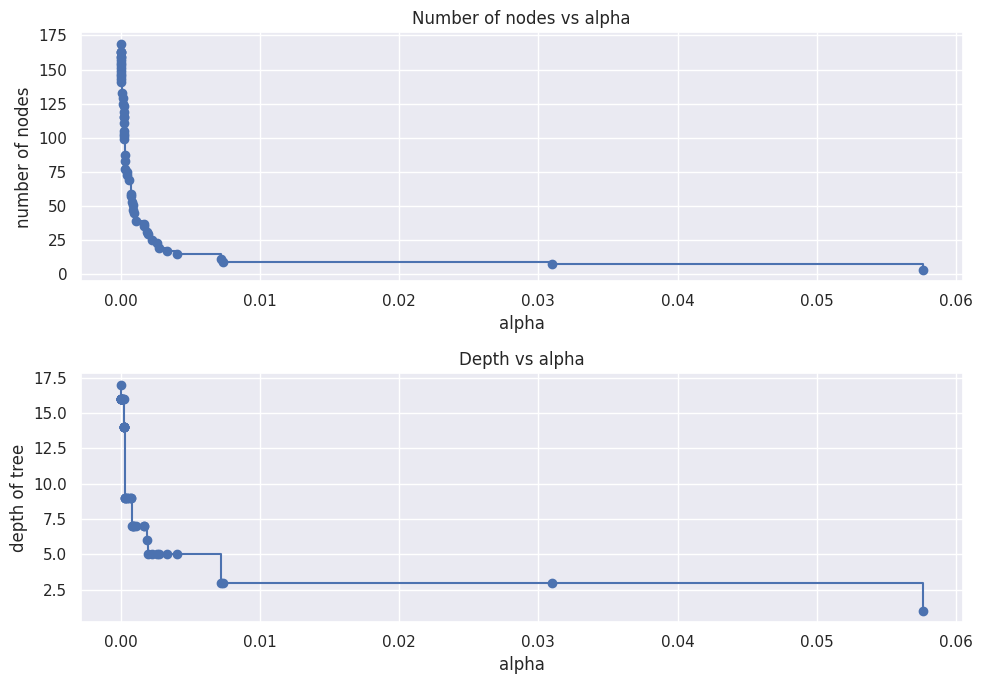

In [75]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Number of nodes in the last tree is: 1 with ccp_alpha: 0.27983896368075395

In [76]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [77]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [78]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

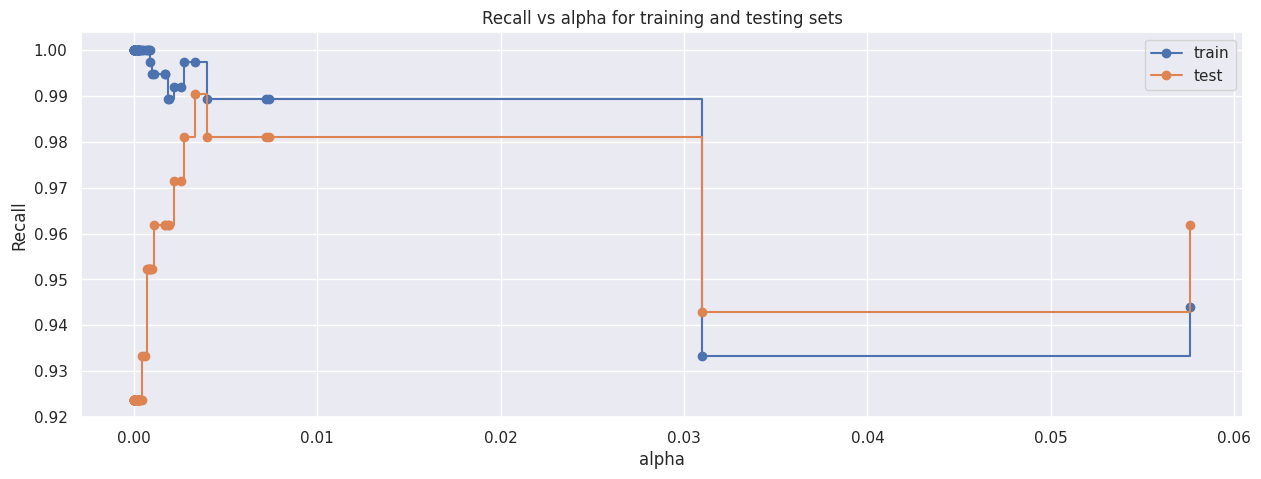

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [80]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.003361530304264587),
                       class_weight='balanced', random_state=1)


In [81]:
DecisionTreeClassifier(ccp_alpha=0.27983896368075395, class_weight='balanced',
                       random_state=1)

DecisionTreeClassifier(ccp_alpha=0.27983896368075395, class_weight='balanced',
                       random_state=1)

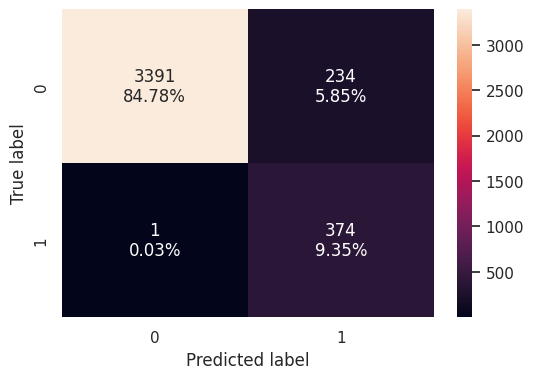

In [82]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [83]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.94125,0.997333,0.615132,0.760936


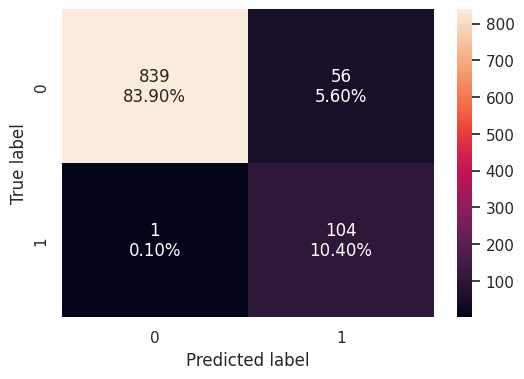

In [93]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [85]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.943,0.990476,0.65,0.784906


In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.99 which shows that the model is able to generalize well on unseen data.

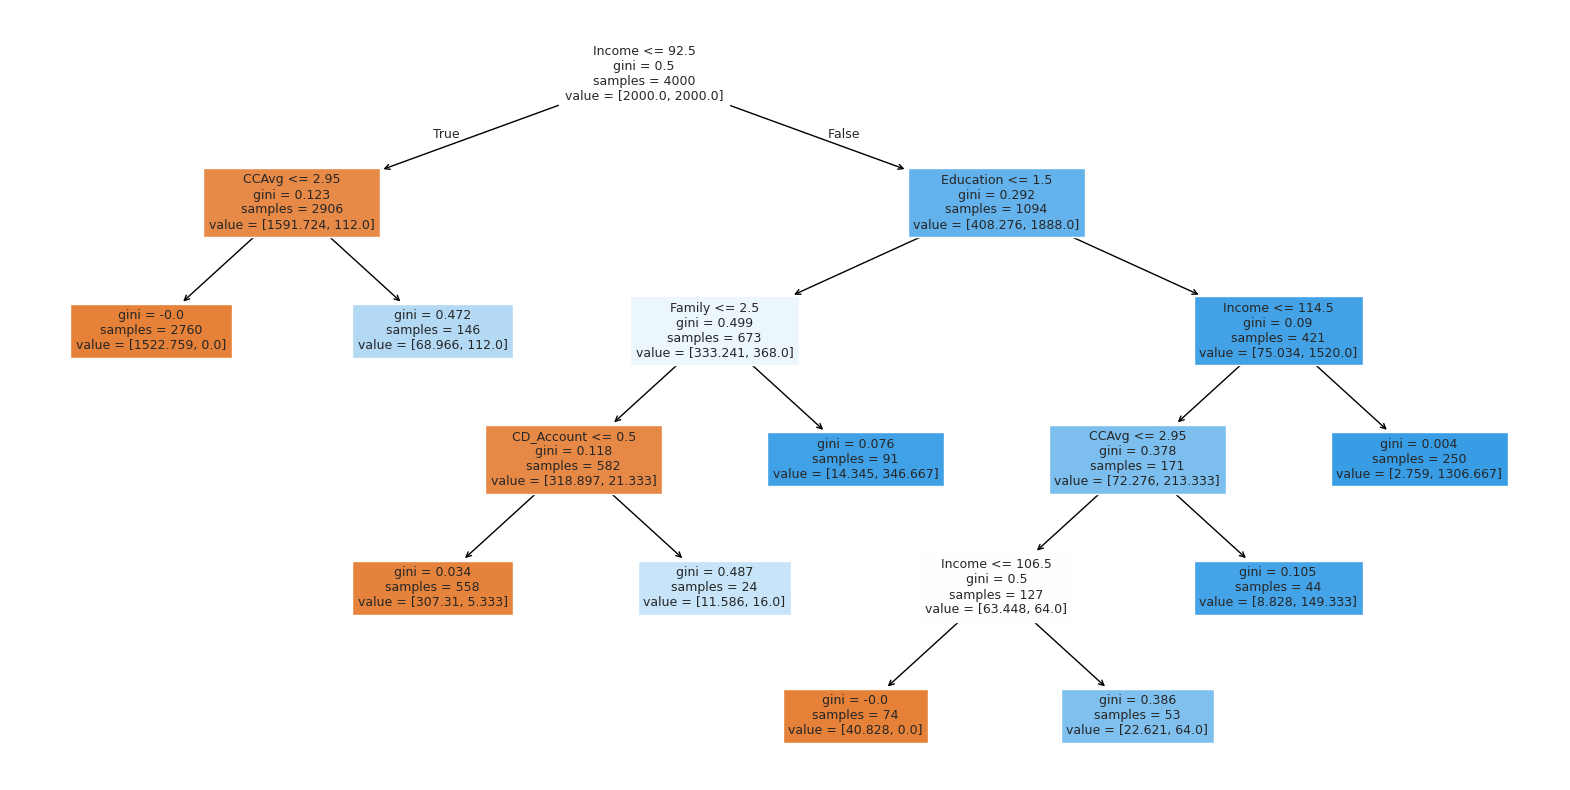

In [86]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [87]:
# Text report showing the rules of a decision tree
print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1522.76, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [68.97, 112.00] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [307.31, 5.33] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [11.59, 16.00] class: 1
|   |   |--- Family >  2.50
|   |   |   |--- weights: [14.34, 346.67] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [40.83, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [22.62, 64.00] class: 1
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [8.83, 149.33] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.76, 1306.67] class: 1



In [94]:
# Checking importances
importances = model4.feature_importances_
indices = np.argsort(importances)

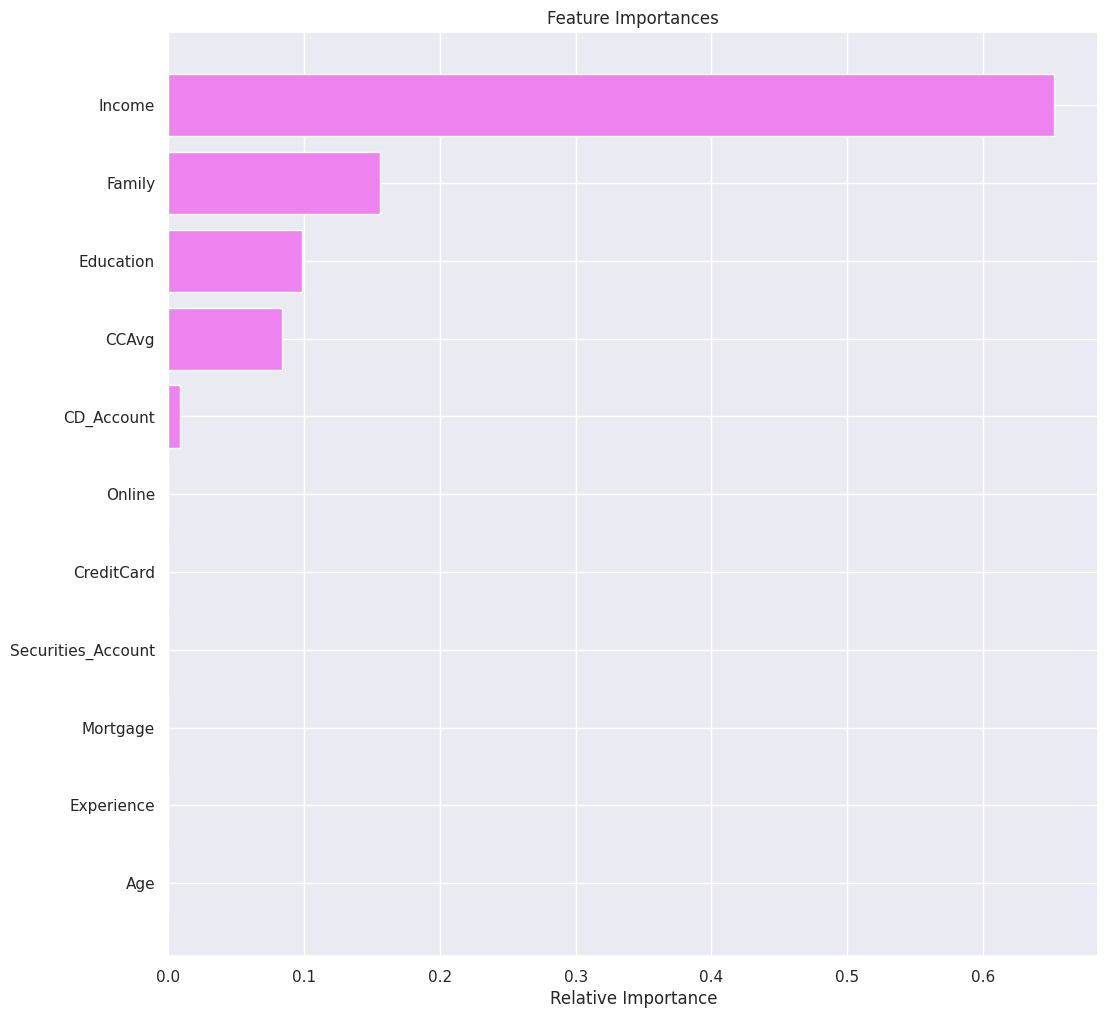

In [95]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income and Family are the most important features for the post pruned tree.

## Model Performance Comparison and Final Model Selection

#### Comparison of Models and Final Model Selection

In [91]:
# Training Performance Comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.783750,0.941250
Recall,1.0,1.0,1.000000,0.997333
Precision,1.0,1.0,0.302419,0.615132
F1,1.0,1.0,0.464396,0.760936


In [92]:
# Testing Performance Comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.989000,0.988000,0.800000,0.943000
Recall,0.933333,0.923810,1.000000,0.990476
Precision,0.960784,0.960396,0.344262,0.650000
F1,0.946860,0.941748,0.512195,0.784906


- Observation (Overview)

  - Although the Decision Tree with pre-pruning achieved perfect recall, it also led to a large number of false positives, as seen by its very low precision and F1-score.

  - This suggests the model is overpredicting positive cases, which could result in wasted resources targeting uninterested customers.

  - For this case, the default Decision Tree is a better fit — it maintains a high recall (93.3%), while also achieving very high precision (96%) and strong overall performance with an accuracy of 98.9%.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

### Conclusions

  - A **Decision Tree model** was built to predict whether a customer is likely to accept a personal loan offer.

  - The best-performing model was the **default Decision Tree**, which achieved:
    - **Recall of 93.3%**: correctly identified most customers likely to accept the loan.
    - **Precision of 96.1%**: most predicted "yes" customers were actually interested.
    - **F1-score of 0.947**: strong balance between precision and recall.
    - **Accuracy of 98.9%** on the test set.

  - From the decision tree, it was observed that:
    - Customers with **income above USD 92K**,
    - Who have **graduate or advanced education levels**,
    - And who **spend more than USD 2.90K on average per month on credit cards**  
  are **more likely to accept personal loans**.

  - The key variables influencing the prediction were **Income**, **Education**, and **Credit Card Average Spending (CCAvg)**.


### Recommendations

- The company should **prioritize marketing efforts** toward:
  - Customers with higher income
  - Graduate or advanced degrees
  - High credit card usage

- These customer segments have a **higher likelihood of accepting loan offers**, making campaigns more effective.

- **Monitor and retrain** the model periodically with updated data to maintain high performance.

- Consider **building separate models** for different customer segments (e.g., by region, tenure, or account type) to improve targeting.